In [1]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
len(os.listdir('/anvar/private_datasets/glioma_burdenko/dcm2nii_BURDENKO_BASELINE_PUBLISH'))

180

In [8]:
# os.mkdir('/anvar/public_datasets/preproc_study/bgpd/orig/')

In [7]:
os.listdir('/anvar/private_datasets/glioma_burdenko/dcm2nii_BURDENKO_BASELINE_PUBLISH/1360_18')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T1.nii.gz',
 'MASK_DICOM',
 'REF.json',
 'T1',
 'T2',
 'CT1',
 'T2.json',
 'T1.json',
 'mask_GTV_FLAIR.nii.gz',
 'RTSTRUCT',
 'REF',
 'CT1.nii.gz',
 'mask_GTV_FLAIR.json',
 'REF.nii.gz',
 'FLAIR']

In [13]:
os.listdir('/anvar/private_datasets/glioma_burdenko/dcm2nii_BURDENKO_BASELINE_PUBLISH/Patient_54317/')

['FLAIR.nii.gz',
 'FLAIR_real.json',
 'CT1.json',
 'T2_real.json',
 'MASK_DICOM_CT',
 'mask_GTV_CT.nii.gz',
 'T1.nii.gz',
 'REF.json',
 'T1',
 'T2',
 'mask_GTV_CT.json',
 'CT1',
 'T1.json',
 'T2_real.nii.gz',
 'mask_GTV_FLAIR.nii.gz',
 'RTSTRUCT',
 'REF',
 'CT1.nii.gz',
 'CT',
 'REF.nii.gz',
 'FLAIR']

In [24]:
os.listdir('/anvar/private_datasets/glioma_burdenko/dcm2nii_BURDENKO_BASELINE_PUBLISH/Patient_56717/')

['FLAIR.nii.gz',
 'CT1.json',
 'MASK_DICOM_CT',
 'mask_GTV_CT.nii.gz',
 'FLAIR_e6.json',
 'T1.nii.gz',
 'REF.json',
 'T1',
 'T2',
 'T1a.nii.gz',
 'mask_GTV_CT.json',
 'CT1',
 'CT1a.nii.gz',
 'T1.json',
 'mask_GTV_FLAIR.nii.gz',
 'RTSTRUCT',
 'REF',
 'CT1.nii.gz',
 'CT',
 'CT1a.json',
 'T2_e7.nii.gz',
 'REF.nii.gz',
 'FLAIR_e6.nii.gz',
 'FLAIR',
 'T2_e7.json',
 'T1a.json']

In [ ]:
ants.read_image('/anvar/private_datasets/glioma_burdenko/dcm2nii_BURDENKO_BASELINE_PUBLISH/Patient_56717/')

In [17]:
# shutil.rmtree('/anvar/public_datasets/preproc_study/bgpd/orig/Patient_54317')

In [33]:
source_dir = '/anvar/private_datasets/glioma_burdenko/dcm2nii_BURDENKO_BASELINE_PUBLISH/'
save_dir = '/anvar/public_datasets/preproc_study/bgpd/orig/'
for patient in os.listdir(source_dir):
    
    try:
#         os.mkdir(save_dir  + patient)
        shutil.copyfile(source_dir   + patient + '/T1.nii.gz', save_dir  + patient + '/T1.nii.gz')
        shutil.copyfile(source_dir   + patient + '/CT1.nii.gz', save_dir  + patient + '/CT1.nii.gz')
        shutil.copyfile(source_dir   + patient + '/FLAIR.nii.gz', save_dir  + patient + '/FLAIR.nii.gz')
        shutil.copyfile(source_dir   + patient + '/T2.nii.gz', save_dir  + patient + '/T2.nii.gz')
        shutil.copyfile(source_dir   + patient + '/mask_GTV_FLAIR.nii.gz', save_dir  + patient + '/mask_GTV_FLAIR.nii.gz')
        assert (len(os.listdir(save_dir  + patient)) == 5)
    except Exception as e:
        print(e)

### Check sizes

In [26]:
import ants
import pandas as pd
sizes_frame = pd.DataFrame(columns = ['id','fl_x', 'fl_y', 'fl_z', 't1c_x', 't1c_y', 't1c_z'])
import numpy as np
for i in os.listdir(source_dir):
    try:
        fl_size = np.shape(ants.image_read(save_dir + i + '/FLAIR.nii.gz').numpy())
        t1c_size = np.shape(ants.image_read(save_dir + i + '/CT1.nii.gz').numpy())
        sizes_frame = sizes_frame.append(
        {'id': i,
        'fl_x':fl_size[0],
        'fl_y':fl_size[1],
        'fl_z':fl_size[2],
        't1c_x':t1c_size[0],
        't1c_y':t1c_size[1],
        't1c_z':t1c_size[2]}, ignore_index=True
        )
    except:
        pass

<AxesSubplot:>

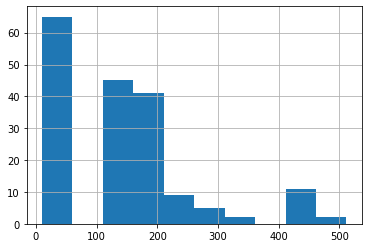

In [27]:
sizes_frame['t1c_z'].hist()

In [29]:
len(sizes_frame[(sizes_frame['fl_z'] >= sizes_frame['t1c_z'])])

90

In [30]:
len(sizes_frame[(sizes_frame['fl_z'] <= sizes_frame['t1c_z'])])

138

In [31]:
sizes_frame_t1 = pd.DataFrame(columns = ['id','t1_x', 't1_y', 't1_z', 't1c_x', 't1c_y', 't1c_z'])
import numpy as np
for i in os.listdir(source_dir):
    try:
        t1_size = np.shape(ants.image_read(save_dir + i + '/T1.nii.gz').numpy())
        t1c_size = np.shape(ants.image_read(save_dir + i + '/CT1.nii.gz').numpy())
        sizes_frame_t1 = sizes_frame_t1.append(
        {'id': i,
        't1_x':t1_size[0],
        't1_y':t1_size[1],
        't1_z':t1_size[2],
        't1c_x':t1c_size[0],
        't1c_y':t1c_size[1],
        't1c_z':t1c_size[2]}, ignore_index=True
        )
    except:
        pass

In [32]:
len(sizes_frame[(sizes_frame['t1_z'] >= sizes_frame['t1c_z'])], len(sizes_frame[(sizes_frame['t1_z'] <= sizes_frame['t1c_z'])])

SyntaxError: unexpected EOF while parsing (2176504054.py, line 1)